# Diabetes Prediction Classifier
## Project Description

This project aims to develop a binary classification model that can predict whether a patient has diabetes based on their medical and demographic features.

## About the Data

The dataset contains a combination of medical and demographic information about patients, along with their diabetes diagnosis (positive or negative).

The features include:
- Age
- Gender
- Body Mass Index (BMI)
- Hypertension
- Heart Disease
- Smoking History
- HbA1c Level
- Blood Glucose Level

This dataset can be used to train machine learning models for predicting the likelihood of diabetes in patients based on their medical history and demographic characteristics.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
import pandas as pd
df = pd.read_csv('data/training_data.csv', index_col=0) 

In [24]:
df_test = pd.read_csv('data/test_data.csv', index_col=0)

In [25]:
df_test

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,ba0d6256-ca6e-46a7-a2fb-2518a8937fd7,Female,60.0,1,0,former,23.77,4.8,130
1,7102b1ab-c7a4-4a43-b1fc-cb588d0553b8,Male,2.0,0,0,No Info,15.19,5.0,159
2,51ba207e-4934-41b4-a31c-cd275c5ca555,Female,74.0,0,0,not current,39.59,6.5,160
3,7e17faaa-0402-4728-9719-83982eba3afd,Female,51.0,0,0,never,26.67,6.6,80
4,08b4e515-286e-4393-9a55-138962f9546e,Male,35.0,0,0,never,26.09,3.5,159
...,...,...,...,...,...,...,...,...,...
26141,1f8db6fe-03f8-48ca-9a42-9f12062b002d,Female,31.0,0,0,never,27.32,6.1,140
26142,5bf3ca1a-ced5-474b-a354-cc3bec9f16d3,Female,65.0,1,1,never,27.25,5.7,100
26143,930e6345-a920-47dd-abd0-6bc0be2ae56f,Male,30.0,1,0,former,57.17,5.8,300
26144,035f3cc4-e8af-448a-8172-a1b027e06de1,Male,20.0,0,0,never,32.70,6.2,159


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73718 entries, 0 to 73717
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   73718 non-null  object 
 1   gender               73718 non-null  object 
 2   age                  73718 non-null  float64
 3   hypertension         73718 non-null  int64  
 4   heart_disease        73718 non-null  int64  
 5   smoking_history      73718 non-null  object 
 6   bmi                  73718 non-null  float64
 7   HbA1c_level          73718 non-null  float64
 8   blood_glucose_level  73718 non-null  int64  
 9   diabetes             73718 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 6.2+ MB


In [27]:
df.columns

Index(['ID', 'gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes'],
      dtype='object')

In [28]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,41.852959,0.078963,0.040858,27.348037,5.534038,138.197835,0.088852
std,22.488153,0.269683,0.197963,6.776093,1.070917,40.892972,0.284532
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.430000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.900000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


### Checking null values

In [29]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Checking and deleting duplicate values

In [30]:
df.duplicated().sum()

3718

In [31]:
df = df.drop_duplicates()

## Data Visualization

In [32]:
print(df['diabetes'].value_counts())
print(df['diabetes'].value_counts()*100/len(df))

diabetes
0    63800
1     6200
Name: count, dtype: int64
diabetes
0    91.142857
1     8.857143
Name: count, dtype: float64


In [33]:
df[['ID', 'gender', 'age', 'hypertension', 'heart_disease', 
    'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = df[['ID', 'gender', 'age', 'hypertension', 'heart_disease', 
    'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']].replace([np.inf, -np.inf], np.NaN)

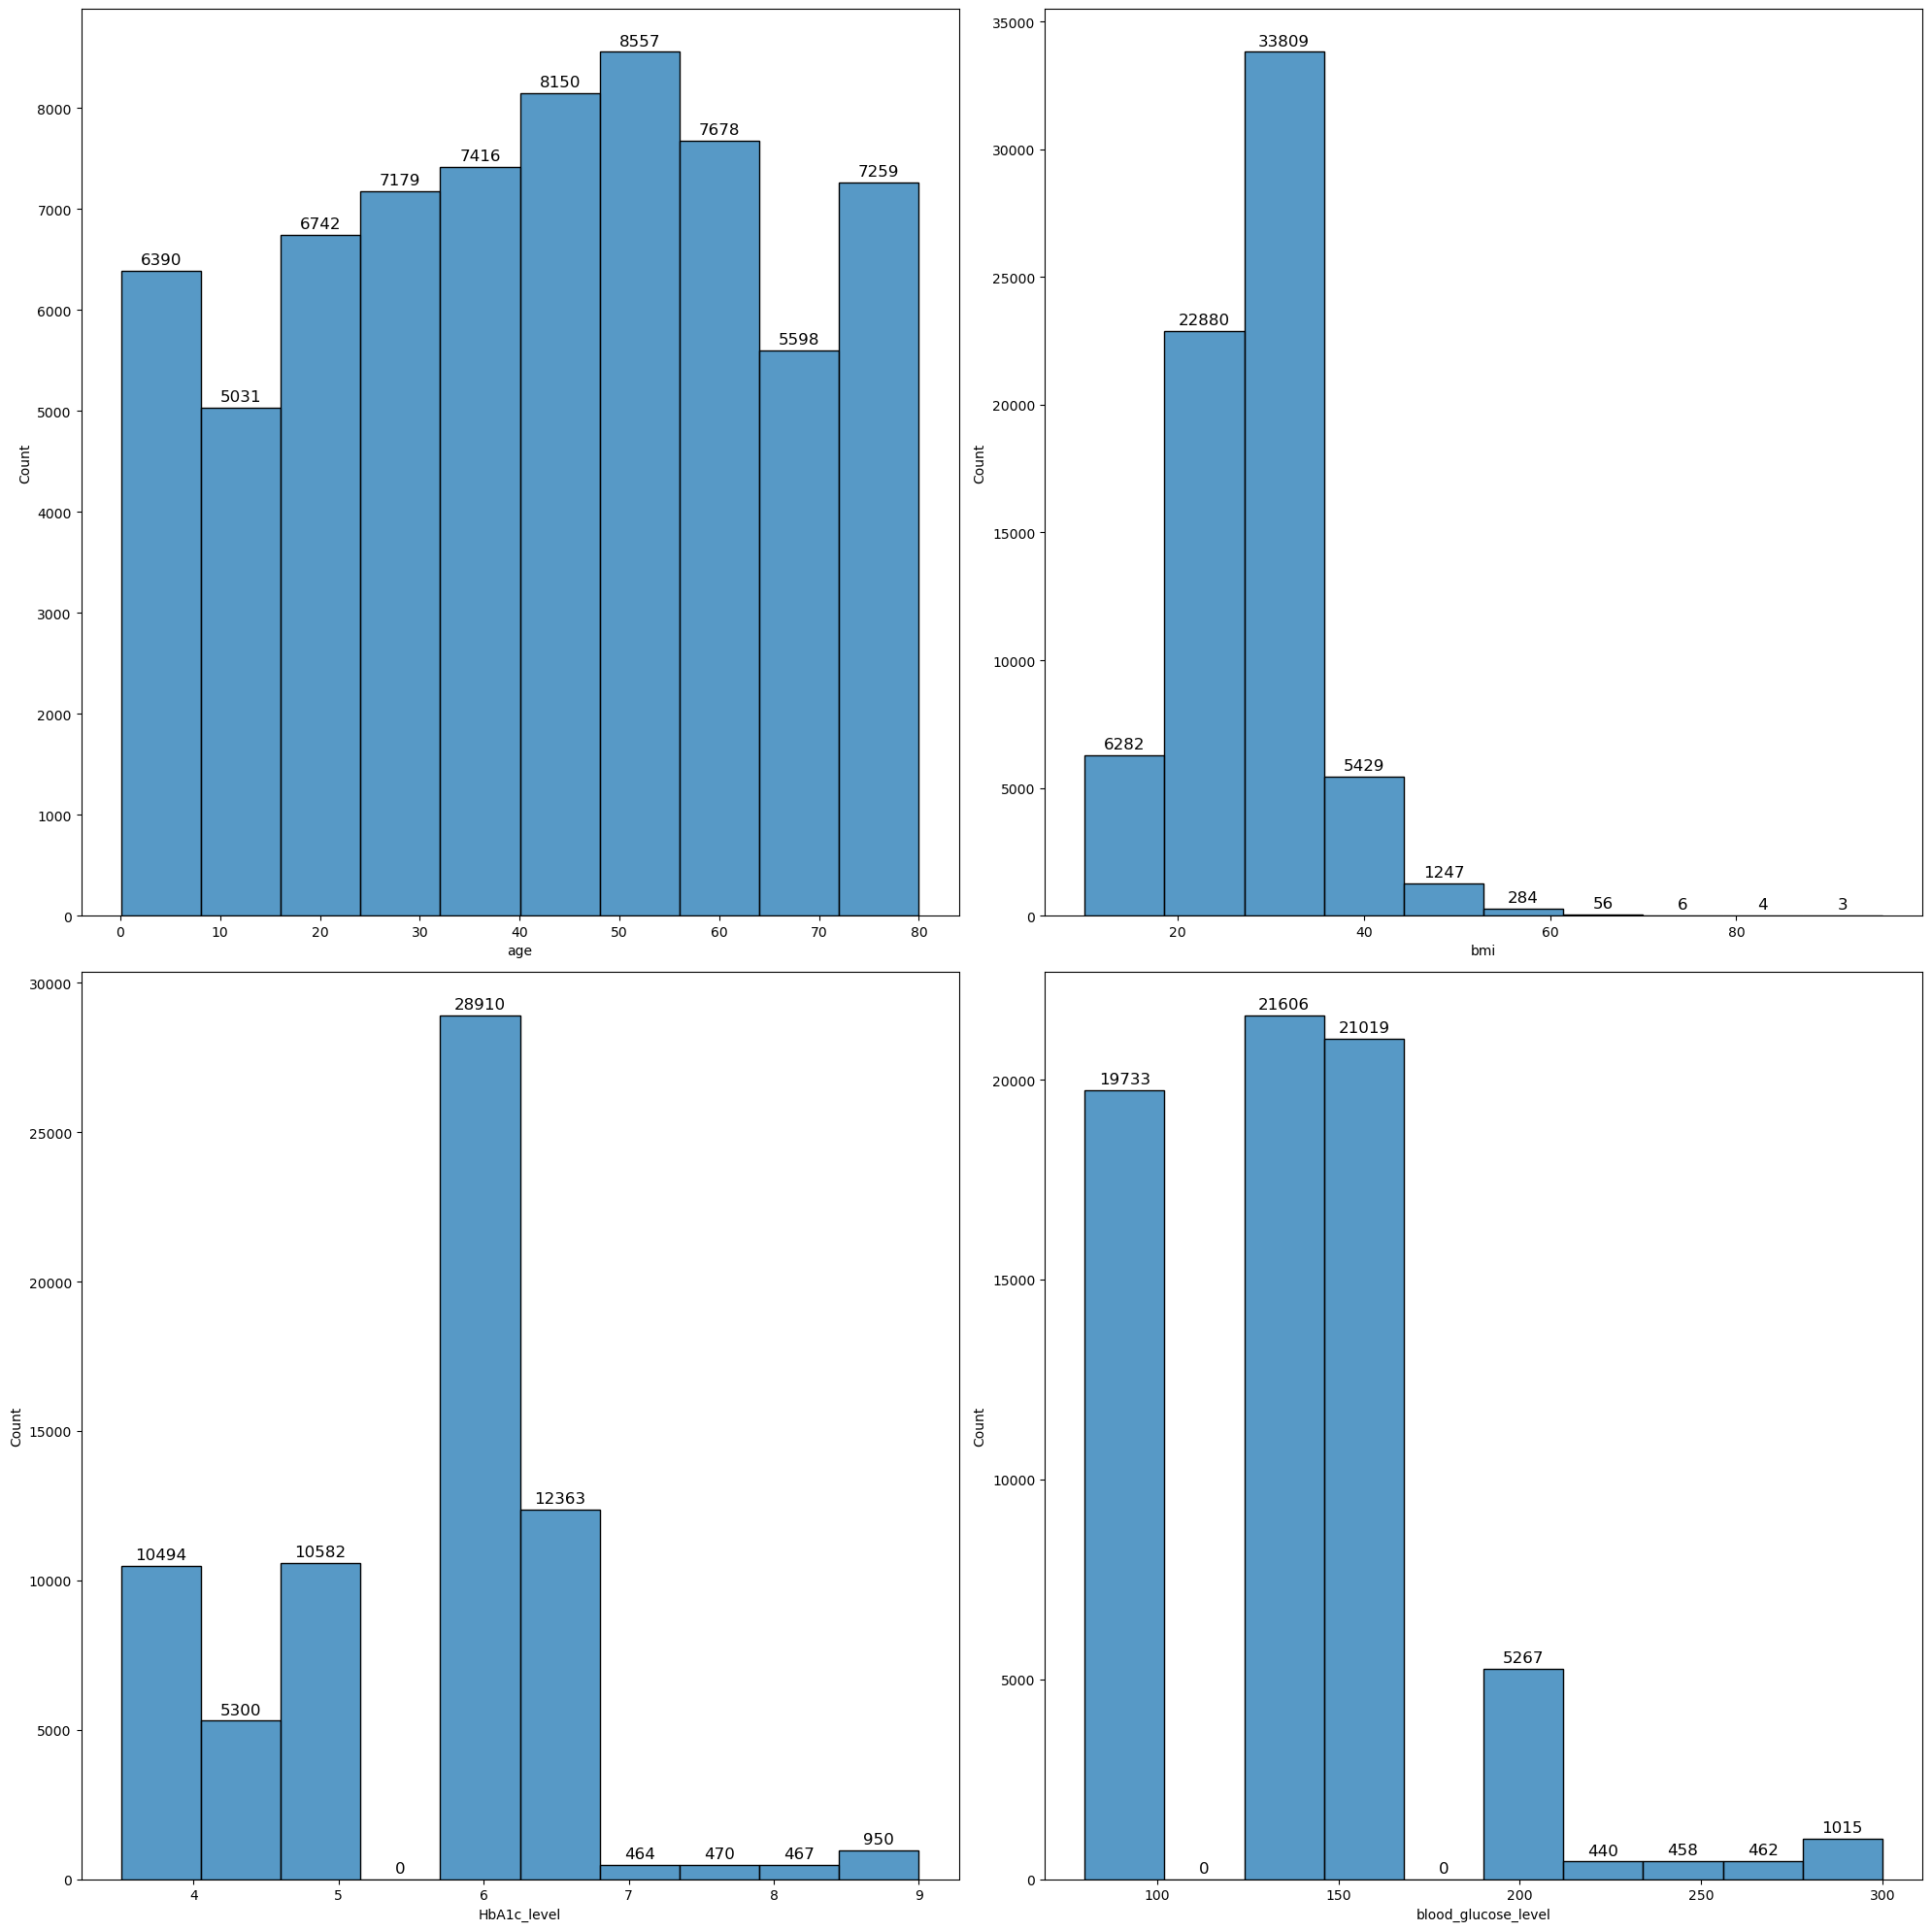

In [34]:
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

sns.histplot(df.age, bins=10, ax=ax[0, 0])
add_labels(ax[0, 0])  

sns.histplot(df.bmi, bins=10, ax=ax[0, 1])
add_labels(ax[0, 1])  

sns.histplot(df.HbA1c_level, bins=10, ax=ax[1, 0])
add_labels(ax[1, 0])  

sns.histplot(df.blood_glucose_level, bins=10, ax=ax[1, 1])
add_labels(ax[1, 1])  
plt.tight_layout()
plt.show()

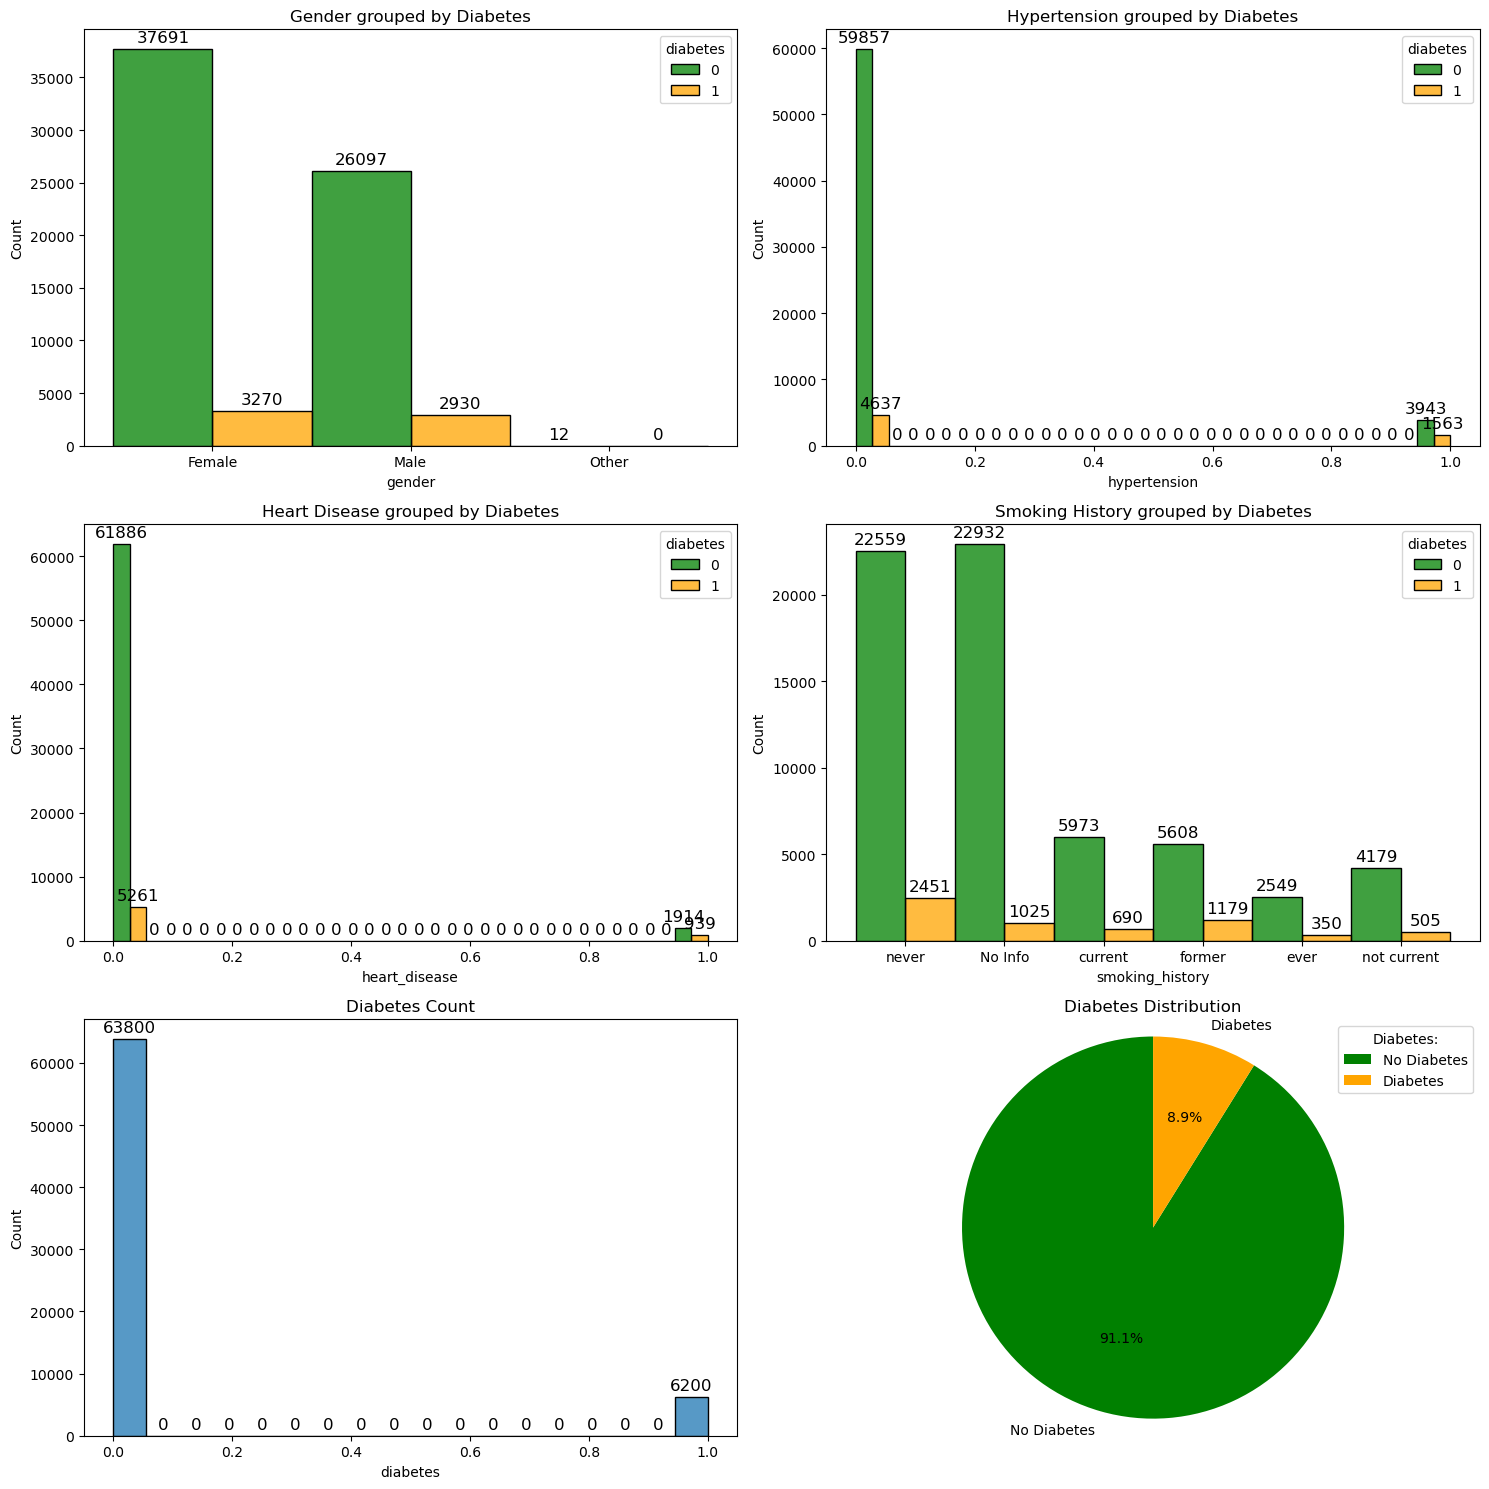

In [35]:
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
plot_data = [
    ('gender', 'Gender grouped by Diabetes'),
    ('hypertension', 'Hypertension grouped by Diabetes'),
    ('heart_disease', 'Heart Disease grouped by Diabetes'),
    ('smoking_history', 'Smoking History grouped by Diabetes'),
    ('diabetes', 'Diabetes Count')
]

palette = {0: 'green', 1: 'orange'}
for i, (column, title) in enumerate(plot_data[:-1]):
    row = i // 2
    col = i % 2
    ax = sns.histplot(ax=axes[row, col], x=column, hue='diabetes', data=df, palette=palette, multiple="dodge", edgecolor='black')
    axes[row, col].set_title(title)
    add_labels(ax)

ax = sns.histplot(ax=axes[2, 0], x='diabetes', data=df)
axes[2, 0].set_title('Diabetes Count')
add_labels(ax)

diabetes_counts = df['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')
axes[2, 1].legend(title='Diabetes:')

plt.tight_layout()
plt.show()

MAX AGE: 80.0
MIN AGE: 0.08
 
Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.08  80.0
1         3.00  80.0


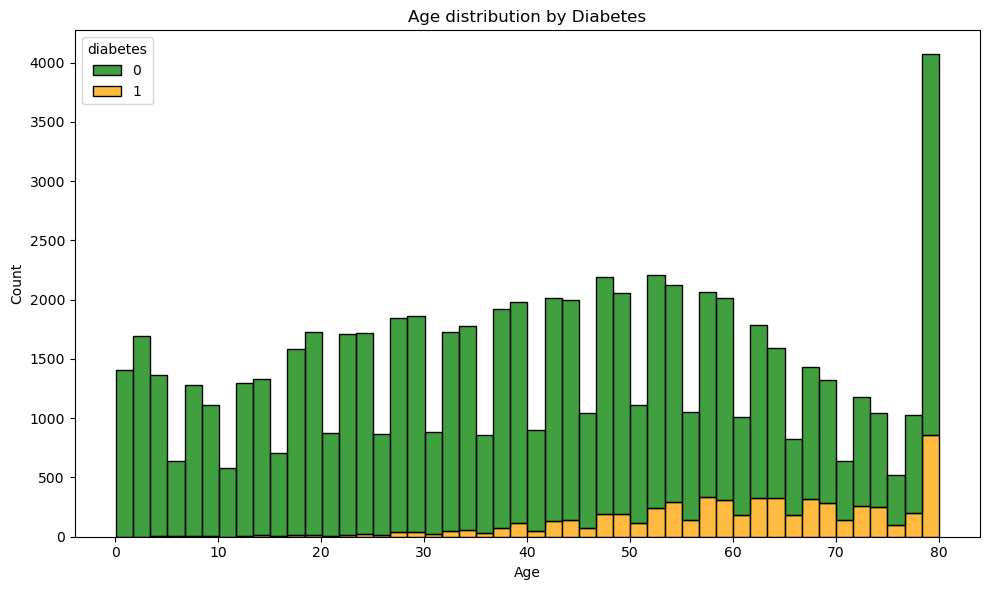

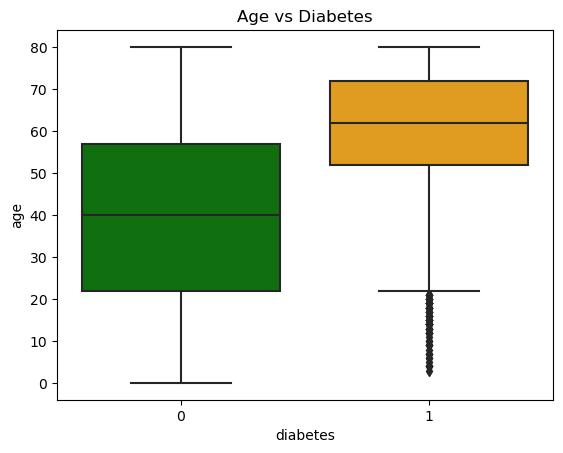

In [36]:
print("MAX AGE: " + str(df['age'].max()))
print("MIN AGE: " + str(df['age'].min()))

grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])
print(" ")
print("Age Statistics by Diabetes Status:")
print(grouped_ages)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='diabetes', palette={0: 'green', 1: 'orange'}, multiple="stack", edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution by Diabetes')

plt.tight_layout()
plt.show()

sns.boxplot(x='diabetes', y='age', palette={0: 'green', 1: 'orange'}, data=df)
plt.title('Age vs Diabetes')
plt.show()

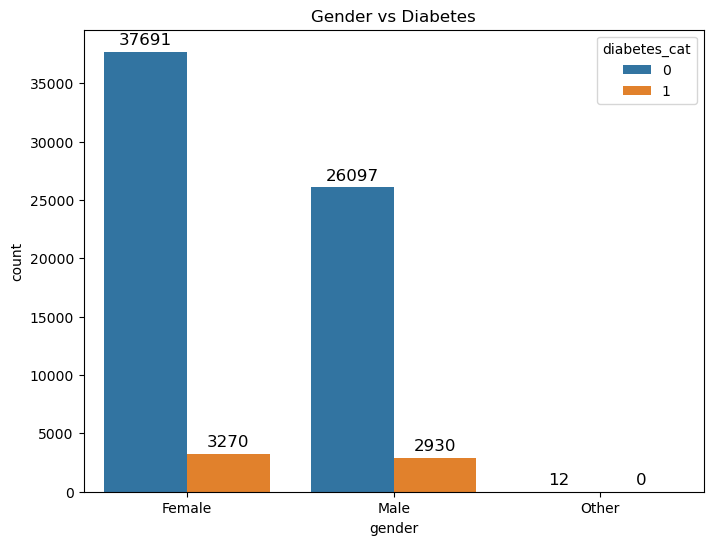

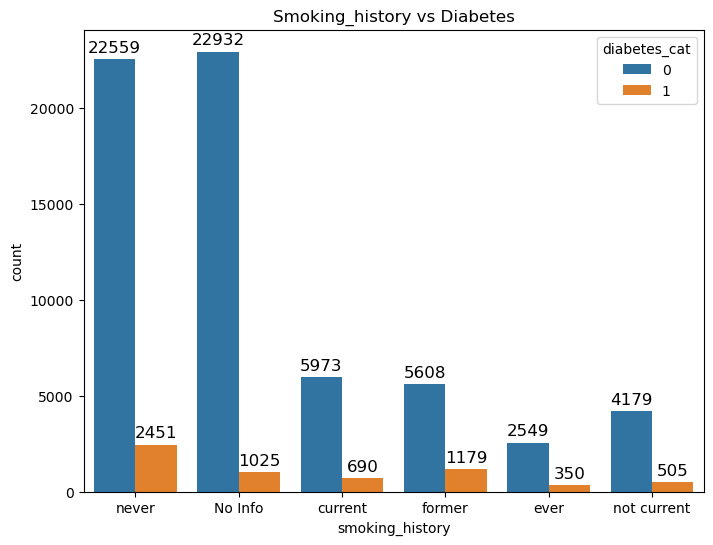

In [37]:
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(f'{int(bar.get_height())}', (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')
        
categorical_features = ['gender', 'smoking_history']
df['diabetes_cat'] = df['diabetes'].astype(str)

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=feature, hue='diabetes_cat', data=df)
    add_labels(ax)
    plt.title(f'{feature.capitalize()} vs Diabetes')
    plt.show()

df.drop('diabetes_cat', axis=1, inplace=True)

In [38]:
df

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,78830894-cdd8-43d1-9655-03db74141b7a,Female,80.0,0,1,never,25.19,6.6,140,0
1,32262c0e-903a-46b8-9061-b1a2f5a3e9b2,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,c4868b73-ca90-48ed-af14-3d1f78a5f030,Male,28.0,0,0,never,27.32,5.7,158,0
3,bec2ef91-5aff-48df-ac16-cb210b5f29fa,Female,36.0,0,0,current,23.45,5.0,155,0
4,1a6852a8-ee80-4d93-bea0-f0cdd941dc3d,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...
69995,d10eb556-3ffd-4994-aac3-12f9454c73c1,Female,36.0,0,0,No Info,24.60,4.8,145,0
69996,9d6512c2-fd98-4f47-acf1-01e6aacfd5f9,Female,2.0,0,0,No Info,17.37,6.5,100,0
69997,01684685-a77d-499d-93e1-1c7c78e33093,Male,66.0,0,0,former,27.83,5.7,155,0
69998,4da466a2-8c88-4a4e-bb6b-48428f4e14d3,Female,24.0,0,0,never,35.42,4.0,100,0


In [39]:
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
df.head()

,ID,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,78830894-cdd8-43d1-9655-03db74141b7a,0,80.0,0,1,4,25.19,6.6,140,0
1,32262c0e-903a-46b8-9061-b1a2f5a3e9b2,0,54.0,0,0,0,27.32,6.6,80,0
2,c4868b73-ca90-48ed-af14-3d1f78a5f030,1,28.0,0,0,4,27.32,5.7,158,0
3,bec2ef91-5aff-48df-ac16-cb210b5f29fa,0,36.0,0,0,1,23.45,5.0,155,0
4,1a6852a8-ee80-4d93-bea0-f0cdd941dc3d,1,76.0,1,1,1,20.14,4.8,155,0


In [40]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy * 100, '%')
print(classification_report(y_test, y_pred))

# --- Прогнозирование для первых 10 значений из исходной таблицы ---

X_subset = df[features].iloc[:10]
subset_predictions = model.predict(X_subset)
actual_values = df['diabetes'].iloc[:10].values
print("\nPredictions for the first 10 rows:")
for i, (pred, actual) in enumerate(zip(subset_predictions, actual_values)):
    pred_label = 'Diabetes' if pred == 1 else 'No Diabetes'
    actual_label = 'Diabetes' if actual == 1 else 'No Diabetes'
    print(f"Row {i+1}: Predicted = {pred_label}, Actual = {actual_label}")


Accuracy on test set:  96.8 %
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     12757
           1       0.96      0.67      0.79      1243

    accuracy                           0.97     14000
   macro avg       0.96      0.83      0.89     14000
weighted avg       0.97      0.97      0.97     14000


Predictions for the first 10 rows:
Row 1: Predicted = No Diabetes, Actual = No Diabetes
Row 2: Predicted = No Diabetes, Actual = No Diabetes
Row 3: Predicted = No Diabetes, Actual = No Diabetes
Row 4: Predicted = No Diabetes, Actual = No Diabetes
Row 5: Predicted = No Diabetes, Actual = No Diabetes
Row 6: Predicted = No Diabetes, Actual = No Diabetes
Row 7: Predicted = Diabetes, Actual = Diabetes
Row 8: Predicted = No Diabetes, Actual = No Diabetes
Row 9: Predicted = No Diabetes, Actual = No Diabetes
Row 10: Predicted = No Diabetes, Actual = No Diabetes


In [44]:
label_encoder = LabelEncoder()
df_test['gender'] = label_encoder.fit_transform(df_test['gender'])
df_test['smoking_history'] = label_encoder.fit_transform(df_test['smoking_history'])

X_set = df_test[features] 
predictions = model.predict(X_set) 
submission_df = pd.DataFrame({
    'ID': df_test['ID'],       
    'prediction': predictions  
})

submission_df.to_csv('data/submission.csv', index=False)
print(submission_df.head())

                                     ID  prediction
0  ba0d6256-ca6e-46a7-a2fb-2518a8937fd7           0
1  7102b1ab-c7a4-4a43-b1fc-cb588d0553b8           0
2  51ba207e-4934-41b4-a31c-cd275c5ca555           0
3  7e17faaa-0402-4728-9719-83982eba3afd           0
4  08b4e515-286e-4393-9a55-138962f9546e           0


## Final Submission

After training and evaluating the model, we generate predictions on the provided test dataset. These predictions are saved in the required format for submission.

The final data/submission.csv file must contain:
- A column ID that matches the test dataset
- A column prediction that contains only class labels: 0 (no diabetes) or 1 (diabetes)

## Conclusion

In this notebook, we:
- Explored and cleaned the dataset
- Engineered features and handled missing values
- Trained several classification models
- Selected the best-performing model based on evaluation metrics
- Generated predictions on the test dataset

This project demonstrates the end-to-end process of building a supervised learning pipeline for medical classification tasks.